<a href="https://colab.research.google.com/github/asdf1027/knu_bdna_2022.1801311/blob/main/%EA%B9%80%ED%98%84%EC%8B%9D_10%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# 10강

In [60]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import mglearn
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


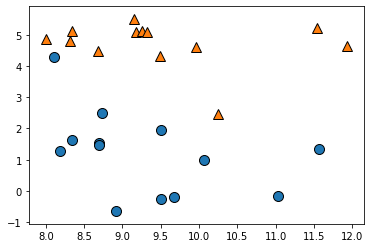

In [62]:
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf=LogisticRegression()
clf.fit(X,y)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


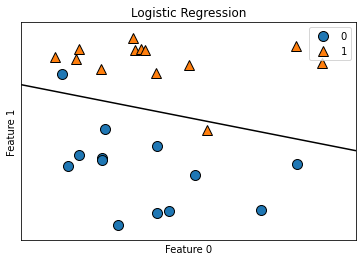

In [65]:
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5)
plt.title('Logistic Regression')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()
# 경계 그리기

In [66]:
print('score:{:.3f}'.format(clf.score(X,y)))

score:0.923


In [67]:
from sklearn.datasets import load_breast_cancer
# 유방암 dataset

In [68]:
cancer=load_breast_cancer()

In [69]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [70]:
cancer.data.shape

(569, 30)

In [71]:
cancer.target.shape

(569,)

In [72]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [75]:
logreg=LogisticRegression(max_iter=100000).fit(X_train,y_train)

In [76]:
print("Train score: {:.4f}".format(logreg.score(X_train,y_train)))
print("Test score: {:.4f}".format(logreg.score(X_test,y_test)))

Train score: 0.9577
Test score: 0.9580


In [92]:
logreg100=LogisticRegression(C=100,max_iter=100000).fit(X_train,y_train)

print("Train score: {:.2f}".format(logreg100.score(X_train,y_train)))
print("Test score: {:.2f}".format(logreg100.score(X_test,y_test)))
# C=100 일 때

Train score: 0.98
Test score: 0.97


In [93]:
logreg1000=LogisticRegression(C=1000,max_iter=100000).fit(X_train,y_train)

print("Train score: {:.2f}".format(logreg1000.score(X_train,y_train)))
print("Test score: {:.2f}".format(logreg1000.score(X_test,y_test)))
# C=1000 일 때

Train score: 0.99
Test score: 0.99


In [94]:
logreg10000=LogisticRegression(C=10000,max_iter=100000).fit(X_train,y_train)

print("Train score: {:.2f}".format(logreg10000.score(X_train,y_train)))
print("Test score: {:.2f}".format(logreg10000.score(X_test,y_test)))
# C=10000 일 때

Train score: 0.98
Test score: 0.98


In [95]:
logreg1=LogisticRegression(C=1,max_iter=100000).fit(X_train,y_train)

print("Train score: {:.2f}".format(logreg1.score(X_train,y_train)))
print("Test score: {:.2f}".format(logreg1.score(X_test,y_test)))
# C=1 일 때

Train score: 0.96
Test score: 0.96


In [96]:
logreg001=LogisticRegression(C=0.01,max_iter=100000).fit(X_train,y_train)

print("Train score: {:.2f}".format(logreg001.score(X_train,y_train)))
print("Test score: {:.2f}".format(logreg001.score(X_test,y_test)))
# C=0.01 일 때

Train score: 0.95
Test score: 0.95


In [102]:
logreg0001=LogisticRegression(C=0.001,max_iter=100000).fit(X_train,y_train)

print("Train score: {:.2f}".format(logreg0001.score(X_train,y_train)))
print("Test score: {:.2f}".format(logreg0001.score(X_test,y_test)))
# C=0.001 일 때

Train score: 0.95
Test score: 0.94


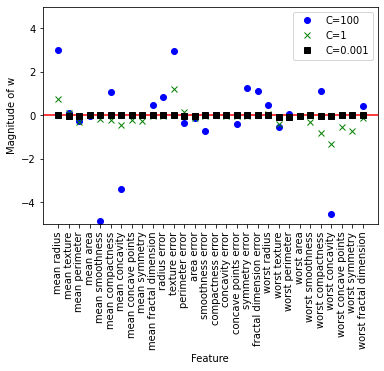

In [105]:
plt.plot(logreg100.coef_.T,'bo',label='C=100')
plt.plot(logreg1.coef_.T,'gx',label='C=1')
plt.plot(logreg0001.coef_.T,'ks',label='C=0.001')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1],'r')
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('Feature')
plt.ylabel('Magnitude of w')
plt.legend()
plt.show()

In [108]:
lr_l1=LogisticRegression(C=1,penalty='l1',solver='liblinear',max_iter=10000).fit(X_train,y_train)

print("Train score: {:.3f}".format(lr_l1.score(X_train,y_train)))
print("Test score: {:.3f}".format(lr_l1.score(X_test,y_test)))
print('Number of Feature used:',sum(sum(lr_l1.coef_!=0)))

Train score: 0.960
Test score: 0.958
Number of Feature used: 10


Train accuracy of Logistic Regression with C: 0.001
Test accuracy of Logistic Regression with C: 0.001
Train accuracy of Logistic Regression with C: 1.000
Test accuracy of Logistic Regression with C: 1.000
Train accuracy of Logistic Regression with C: 100.000
Test accuracy of Logistic Regression with C: 100.000


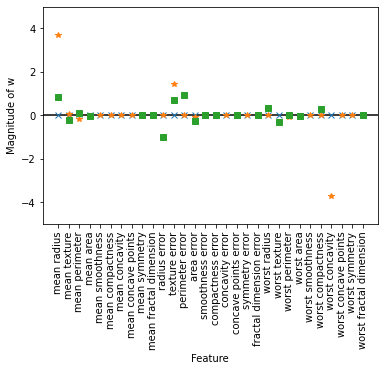

In [109]:
for C,marker in zip([0.001,1,100],['x','*','s']):
  lr_l1=LogisticRegression(C=C,penalty='l1',solver='liblinear',max_iter=10000).fit(X_train,y_train)
  print("Train accuracy of Logistic Regression with C: {:.3f}".format(C, lr_l1.score(X_train,y_train)))
  print("Test accuracy of Logistic Regression with C: {:.3f}".format(C, lr_l1.score(X_test,y_test)))

  plt.plot(lr_l1.coef_.T,marker,label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('Feature')
plt.ylabel('Magnitude of w')
plt.show()